# Code example - 

This demo is available also at this [link](http://motionclouds.invibe.net/posts/testing_components.html) or you can run it interactively using [Binder](https://mybinder.org/v2/gh/NeuralEnsemble/MotionClouds/master).

Motion Clouds are built using a collection of scripts that provides a simple way of generating complex stimuli suitable for neuroscience and psychophysics experiments. It is meant to be an open-source package that can be combined with other packages such as PsychoPy or NeuroTools.

All functions are implemented in one main script called `MotionClouds.py` that handles the Fourier cube, the envelope functions as well as the random phase generation and all Fourier related processing. Additionally, all the auxiliary visualization tools to plot the spectra and the movies are included. Specific scripts such as `test_color.py`, `test_speed.py`, `test_radial.py` and `test_orientation.py` explore the role of different parameters for each individual envelope (respectively color, speed, radial frequency, orientation). Our aim is to keep the code as simple as possible in order to be comprehensible and flexible. To sum up, when we build a custom  Motion Cloud there are 3 simple steps to follow:

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

## a short intro

We load the library and specify we wish to display on the notebook (on by default)

In [2]:
import MotionClouds as mc
mc.figpath = 'figures'
mc.notebook = True

In [3]:
# define Fourier domain
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'demo'
mc.figures_MC(fx, fy, ft,
    V_X=1., V_Y=0., B_V=.5,
    sf_0=.125, B_sf=.1,
    theta=0., B_theta=np.pi/16, alpha=0., figpath=mc.figpath)
mc.in_show_video(name, figpath=mc.figpath)

""



Behind the scene, what we are doing is the following :

## set the MC parameters and construct the Fourier envelope, then visualize it as iso-surfaces:


In [4]:
# define an envelope
envelope = mc.envelope_gabor(fx, fy, ft,
    V_X=1., V_Y=0., B_V=.1,
    sf_0=.15, B_sf=.1,
    theta=0., B_theta=np.pi/8, alpha=1.)
# Render the Fourier Spectrum
render_im = mc.visualize(envelope)

Then, visualize the Fourier Spectrum

In [5]:
mc.figpath

'figures'

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

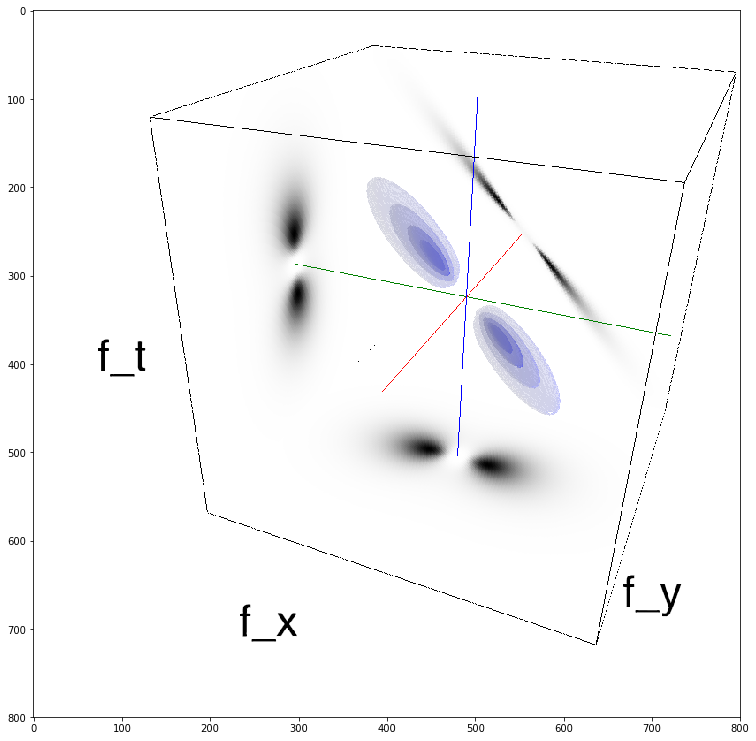

In [7]:
fig, ax = plt.subplots(figsize=[13, 13*render_im.shape[1]/render_im.shape[0]])
ax.imshow(render_im)

## perform the IFFT and contrast normalization

Knowing this envelope, we may now generate an instance of this texture. In particular, we can visualize the stimulus as a spatio-temporal 'cube' (X-Y-T) of the image sequence,

In [8]:
movie = mc.random_cloud(envelope)
movie = mc.rectif(movie)
# Visualize the Stimulus
mc.cube(movie, name=mc.figpath + '/' + name + '_cube', figpath=mc.figpath)

## export the stimulus 

For instance as a movie (.mpeg format available), as separate frames (.bmp and .png formats available) in a compressed zipped folder, or as a Matlab matrix (.mat format).

In [9]:
mc.anim_save(movie, mc.figpath + '/' + name, display=False, vext='.mp4', figpath=mc.figpath)

If some parameters are not given, they are set to default values corresponding to a ''standard'' Motion Cloud. Moreover, the user can easily explore a range of different Motion Clouds simply by setting  an array of values for a determined parameter. Here, for example, we generate 8 MCs with increasing spatial frequency `sf_0` while keeping the other parameters fixed to default values:

In [10]:
for sf_0 in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    name_ = name + '-sf_0-' + str(sf_0).replace('.', '_')
    # function performing plots for a given set of parameters
    mc.figures_MC(fx, fy, ft, name_, sf_0=sf_0, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

# Motion Clouds: testing components of the envelope

In [11]:
help(mc.envelope_gabor)

Help on function envelope_gabor in module MotionClouds.MotionClouds:

envelope_gabor(fx, fy, ft, V_X=1.0, V_Y=0.0, B_V=0.5, sf_0=0.125, B_sf=0.1, loggabor=True, theta=0.0, B_theta=0.19634954084936207, alpha=0.0, **kwargs)
    Returns the Motion Cloud kernel, that is the product of:
        * a speed envelope
        * an orientation envelope
        * an orientation envelope



## Testing the speed

Here the link to the test page for the component [Speed](http://motionclouds.invibe.net/posts/testing-speed.html)

In [12]:
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'speed'
z = mc.envelope_speed(fx, fy, ft)
mc.figures(z, name, figpath=mc.figpath)
mc.in_show_video(name, figpath=mc.figpath)

## Exploring the orientation component of the envelope around a grating.

Here the link to the test page for the [orientation component](http://motionclouds.invibe.net/posts/testing-grating.html)

In [13]:
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'grating'
z = mc.envelope_gabor(fx, fy, ft)
mc.figures(z, name, figpath=mc.figpath)
mc.in_show_video(name, figpath=mc.figpath)

Here the link to the test page for the component [Radial](http://motionclouds.invibe.net/posts/testing-radial.html)

In [14]:
B_theta = np.pi/8.
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'radial'
mc.figures_MC(fx, fy, ft, name, B_theta=B_theta, figpath=mc.figpath)
verbose = False
mc.in_show_video(name, figpath=mc.figpath)

## Testing the color

In some circonstances, it is desirable to create a texture with a different "color" than that of natural images (that is where the envelope is in 1/f).

Here the link to the test page for the component [Color](http://motionclouds.invibe.net/posts/testing-color.html)

In [15]:
name = 'color'
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
z = mc.envelope_color(fx, fy, ft, alpha=1.)
mc.figures(z, name, figpath=mc.figpath)
mc.in_show_video(name, figpath=mc.figpath)